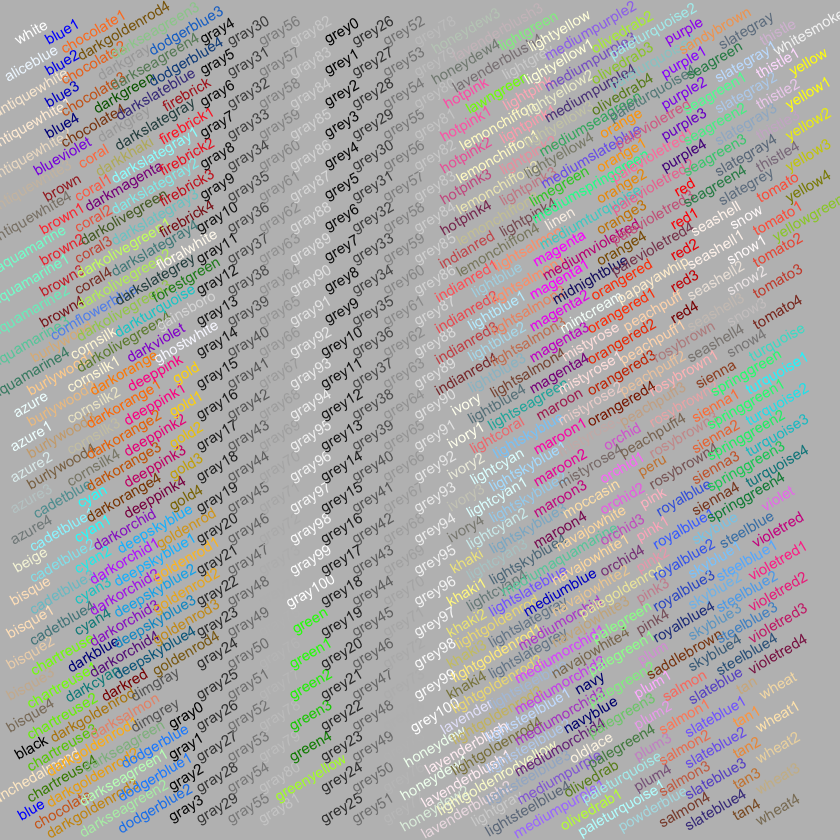

In [1]:
### ----------- Show (almost) all named colors ---------------------

## 1) with traditional 'graphics' package:
showCols1 <- function(bg = "gray", cex = 0.75, srt = 30) {
    m <- ceiling(sqrt(n <- length(cl <- colors())))
    length(cl) <- m*m; cm <- matrix(cl, m)
    ##
    require("graphics")
    op <- par(mar=rep(0,4), ann=FALSE, bg = bg); on.exit(par(op))
    plot(1:m,1:m, type="n", axes=FALSE)
    text(col(cm), rev(row(cm)), cm,  col = cl, cex=cex, srt=srt)
}
showCols1()

Loading required package: grid


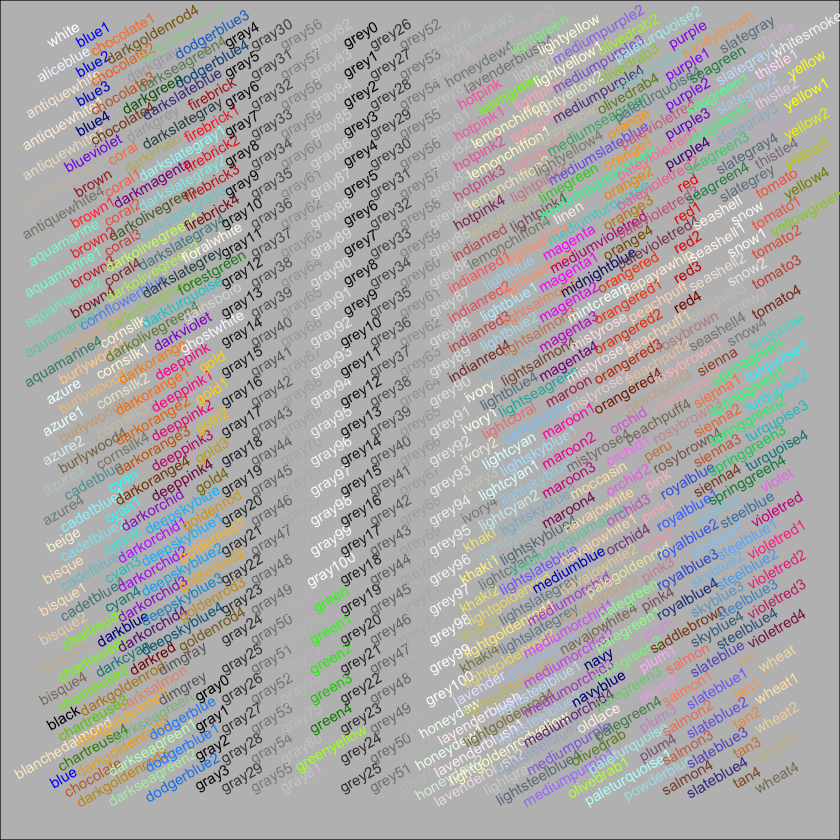

In [2]:
## 2) with 'grid' package:
showCols2 <- function(bg = "grey", cex = 0.75, rot = 30) {
    m <- ceiling(sqrt(n <- length(cl <- colors())))
    length(cl) <- m*m; cm <- matrix(cl, m)
    ##
    require("grid")
    grid.newpage(); vp <- viewport(w = .92, h = .92)
    grid.rect(gp=gpar(fill=bg))
    grid.text(cm, x = col(cm)/m, y = rev(row(cm))/m, rot = rot,
              vp=vp, gp=gpar(cex = cex, col = cm))
}
showCols2()

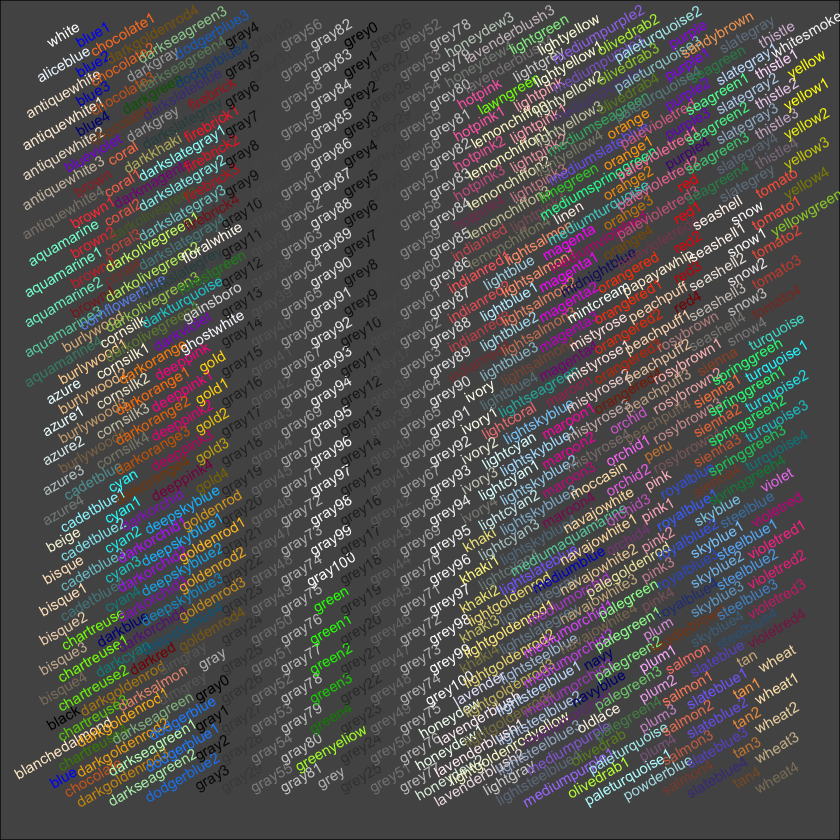

In [3]:
showCols2(bg = "gray33")

In [4]:
##' @title Comparing Colors
##' @param col
##' @param nrow
##' @param ncol
##' @param txt.col
##' @return the grid layout, invisibly
##' @author Marius Hofert, originally
plotCol <- function(col, nrow=1, ncol=ceiling(length(col) / nrow),
                    txt.col="black") {
    stopifnot(nrow >= 1, ncol >= 1)
    if(length(col) > nrow*ncol)
        warning("some colors will not be shown")
    require(grid)
    grid.newpage()
    gl <- grid.layout(nrow, ncol)
    pushViewport(viewport(layout=gl))
    ic <- 1
    for(i in 1:nrow) {
        for(j in 1:ncol) {
            pushViewport(viewport(layout.pos.row=i, layout.pos.col=j))
            grid.rect(gp= gpar(fill=col[ic]))
            grid.text(col[ic], gp=gpar(col=txt.col))
            upViewport()
            ic <- ic+1
        }
    }
    upViewport()
    invisible(gl)
}

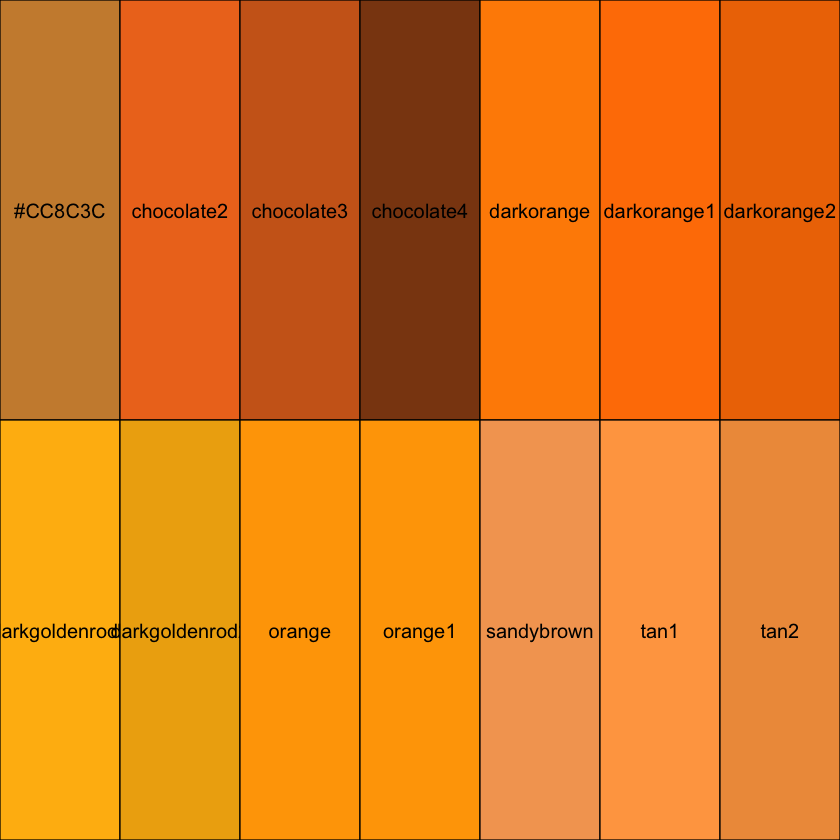

In [5]:
## A Chocolate Bar of colors:
plotCol(c("#CC8C3C", paste0("chocolate", 2:4),
          paste0("darkorange", c("",1:2)), paste0("darkgoldenrod", 1:2),
          "orange", "orange1", "sandybrown", "tan1", "tan2"),
        nrow=2)

In [6]:
##' Find close R colors() to a given color {original by Marius Hofert)
##' using Euclidean norm in (HSV / RGB / ...) color space
nearRcolor <- function(rgb, cSpace = c("hsv", "rgb255", "Luv", "Lab"),
                       dist = switch(cSpace, "hsv" = 0.10, "rgb255" = 30,
                       "Luv" = 15, "Lab" = 12))
{
    if(is.character(rgb)) rgb <- col2rgb(rgb)
    stopifnot(length(rgb <- as.vector(rgb)) == 3)
    Rcol <- col2rgb(.cc <- colors())
    uniqC <- !duplicated(t(Rcol)) # gray9 == grey9 (etc)
    Rcol <- Rcol[, uniqC] ; .cc <- .cc[uniqC]
    cSpace <- match.arg(cSpace)
    convRGB2 <- function(Rgb, to)
        t(convertColor(t(Rgb), from="sRGB", to=to, scale.in=255))
    ## the transformation,  rgb{0..255} --> cSpace :
    TransF <- switch(cSpace,
                     "rgb255" = identity,
                     "hsv" = rgb2hsv,
                     "Luv" = function(RGB) convRGB2(RGB, "Luv"),
                     "Lab" = function(RGB) convRGB2(RGB, "Lab"))
    d <- sqrt(colSums((TransF(Rcol) - as.vector(TransF(rgb)))^2))
    iS <- sort.list(d[near <- d <= dist])# sorted: closest first
    setNames(.cc[near][iS], format(d[near][iS], digits=3))
}

nearRcolor(col2rgb("tan2"), "rgb")
nearRcolor(col2rgb("tan2"), "hsv")
nearRcolor(col2rgb("tan2"), "Luv")
nearRcolor(col2rgb("tan2"), "Lab")

nearRcolor("#334455")

0.0         21.1         25.8         29.5 
      "tan2"       "tan1" "sandybrown"    "sienna1"

0.0000       0.0410       0.0618       0.0638       0.0667       0.0766 
      "tan2"    "sienna2"     "coral2"    "tomato2"       "tan1"      "coral" 
      0.0778       0.0900       0.0912       0.0918 
   "sienna1" "sandybrown"     "coral1"     "tomato"

0.00         7.42         7.48        12.41        13.69 
      "tan2"       "tan1" "sandybrown"    "orange3"    "orange2"

0.00         5.56         8.08        11.31 
      "tan2"       "tan1" "sandybrown"       "peru"

0.0867 
"darkslategray"

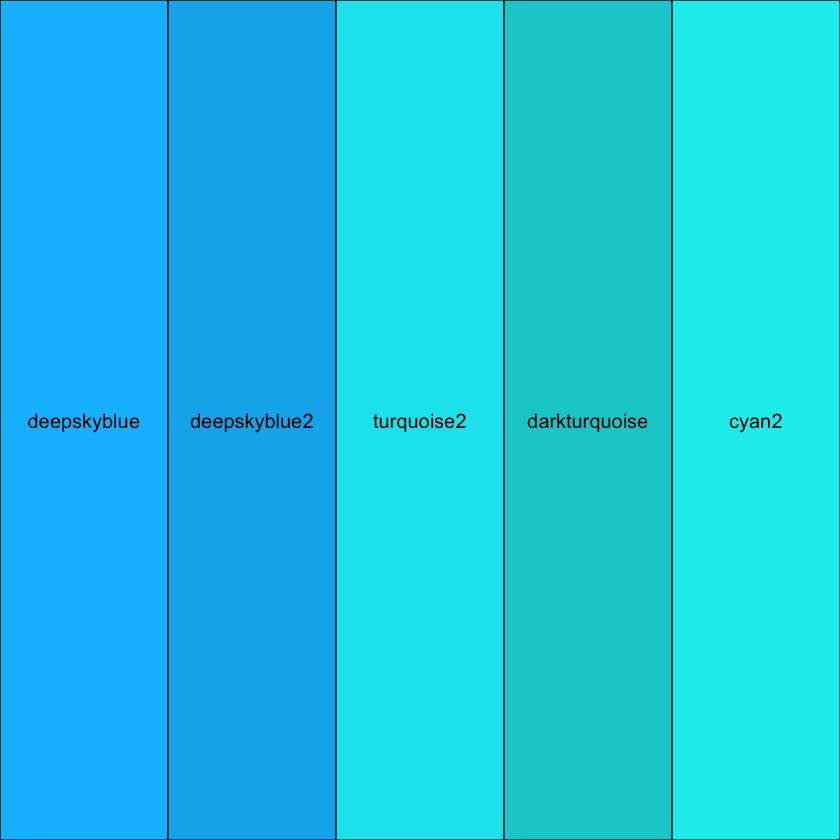

In [7]:
## Now, consider choosing a color by looking in the
## neighborhood of one you know :

plotCol(nearRcolor("deepskyblue", "rgb", dist=50))

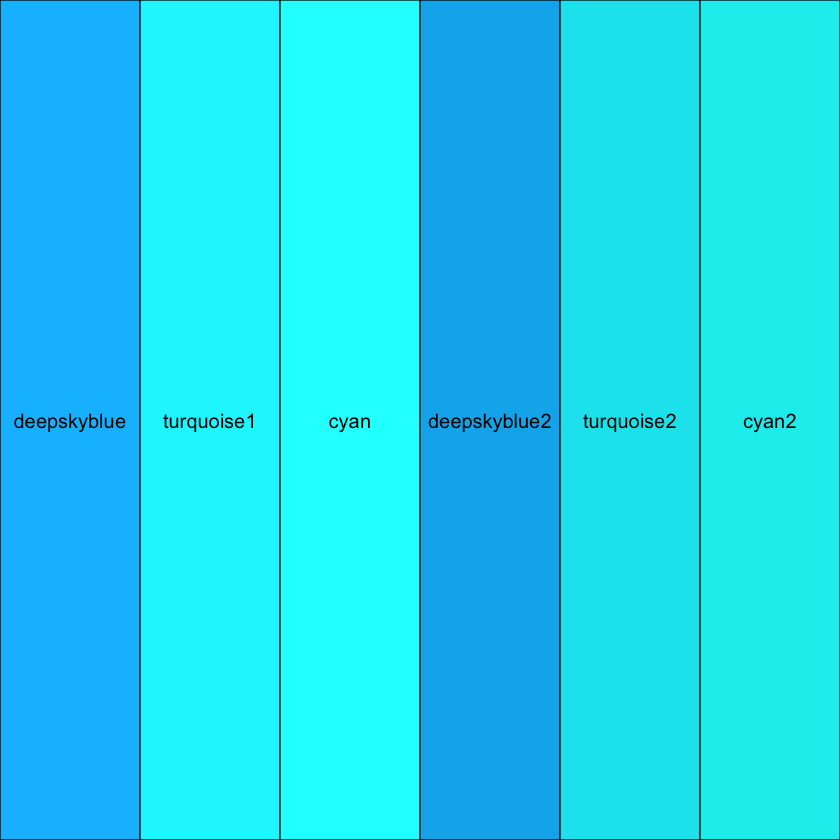

In [8]:
plotCol(nearRcolor("deepskyblue", dist=.1))

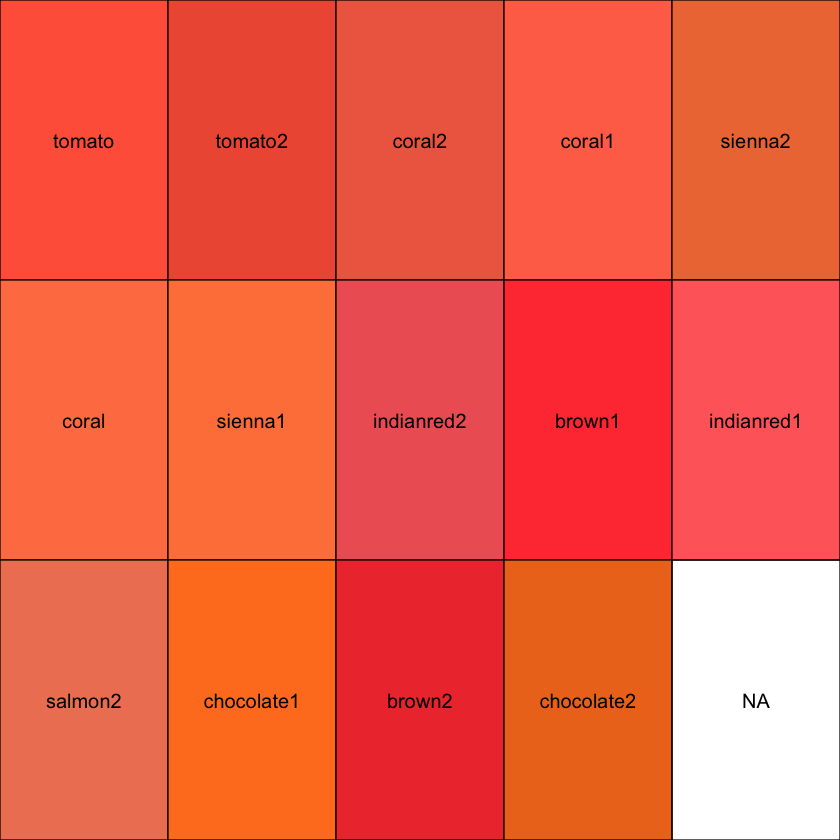

In [9]:
plotCol(nearRcolor("tomato", "rgb", dist= 50), nrow=3)

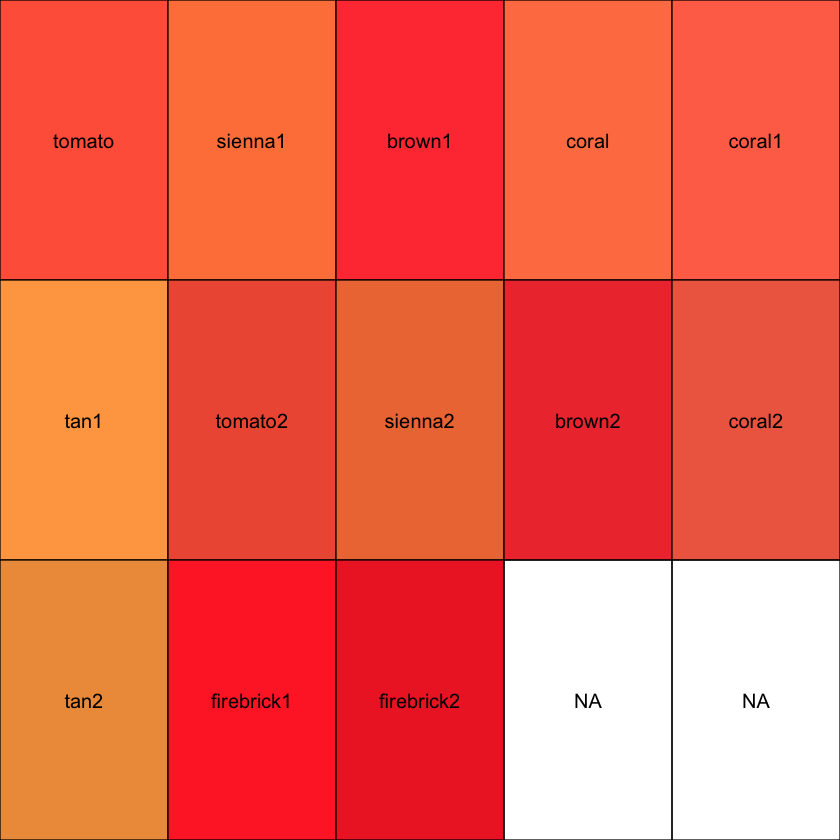

In [10]:
plotCol(nearRcolor("tomato", "hsv", dist=.12), nrow=3)

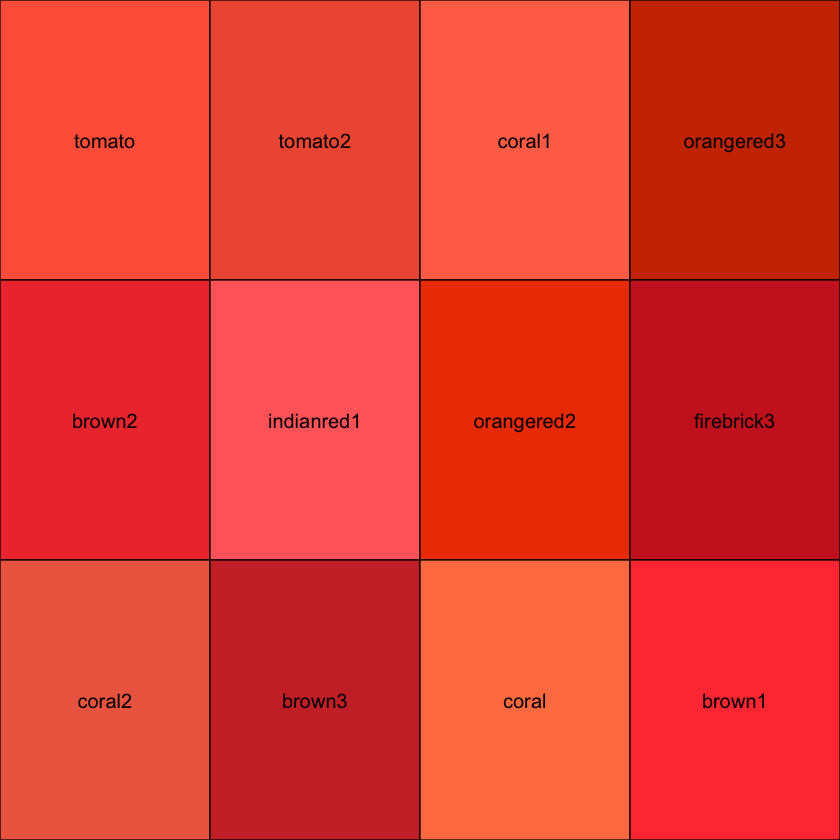

In [11]:
plotCol(nearRcolor("tomato", "Luv", dist= 25), nrow=3)

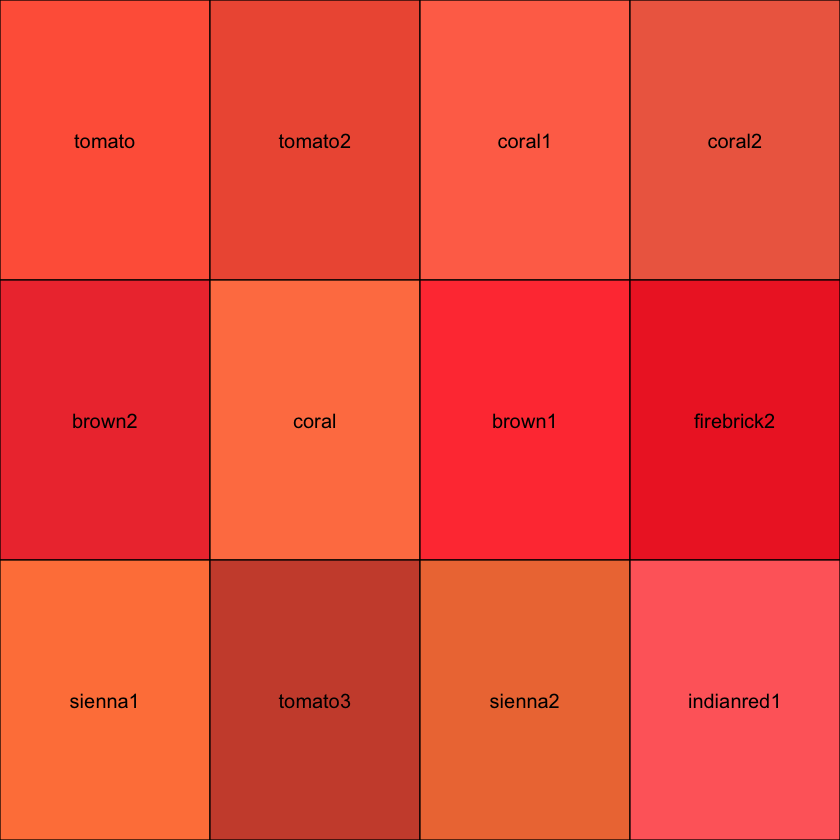

In [12]:
plotCol(nearRcolor("tomato", "Lab", dist= 18), nrow=3)